# Feature importances with forests of trees
ref: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas  version: 0.24.2
numpy   version: 1.16.2
seaborn version: 0.9.0


## data dictionary
source: https://www.kaggle.com/uciml/pima-indians-diabetes-database  
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [3]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/diabetes.csv'
df=pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


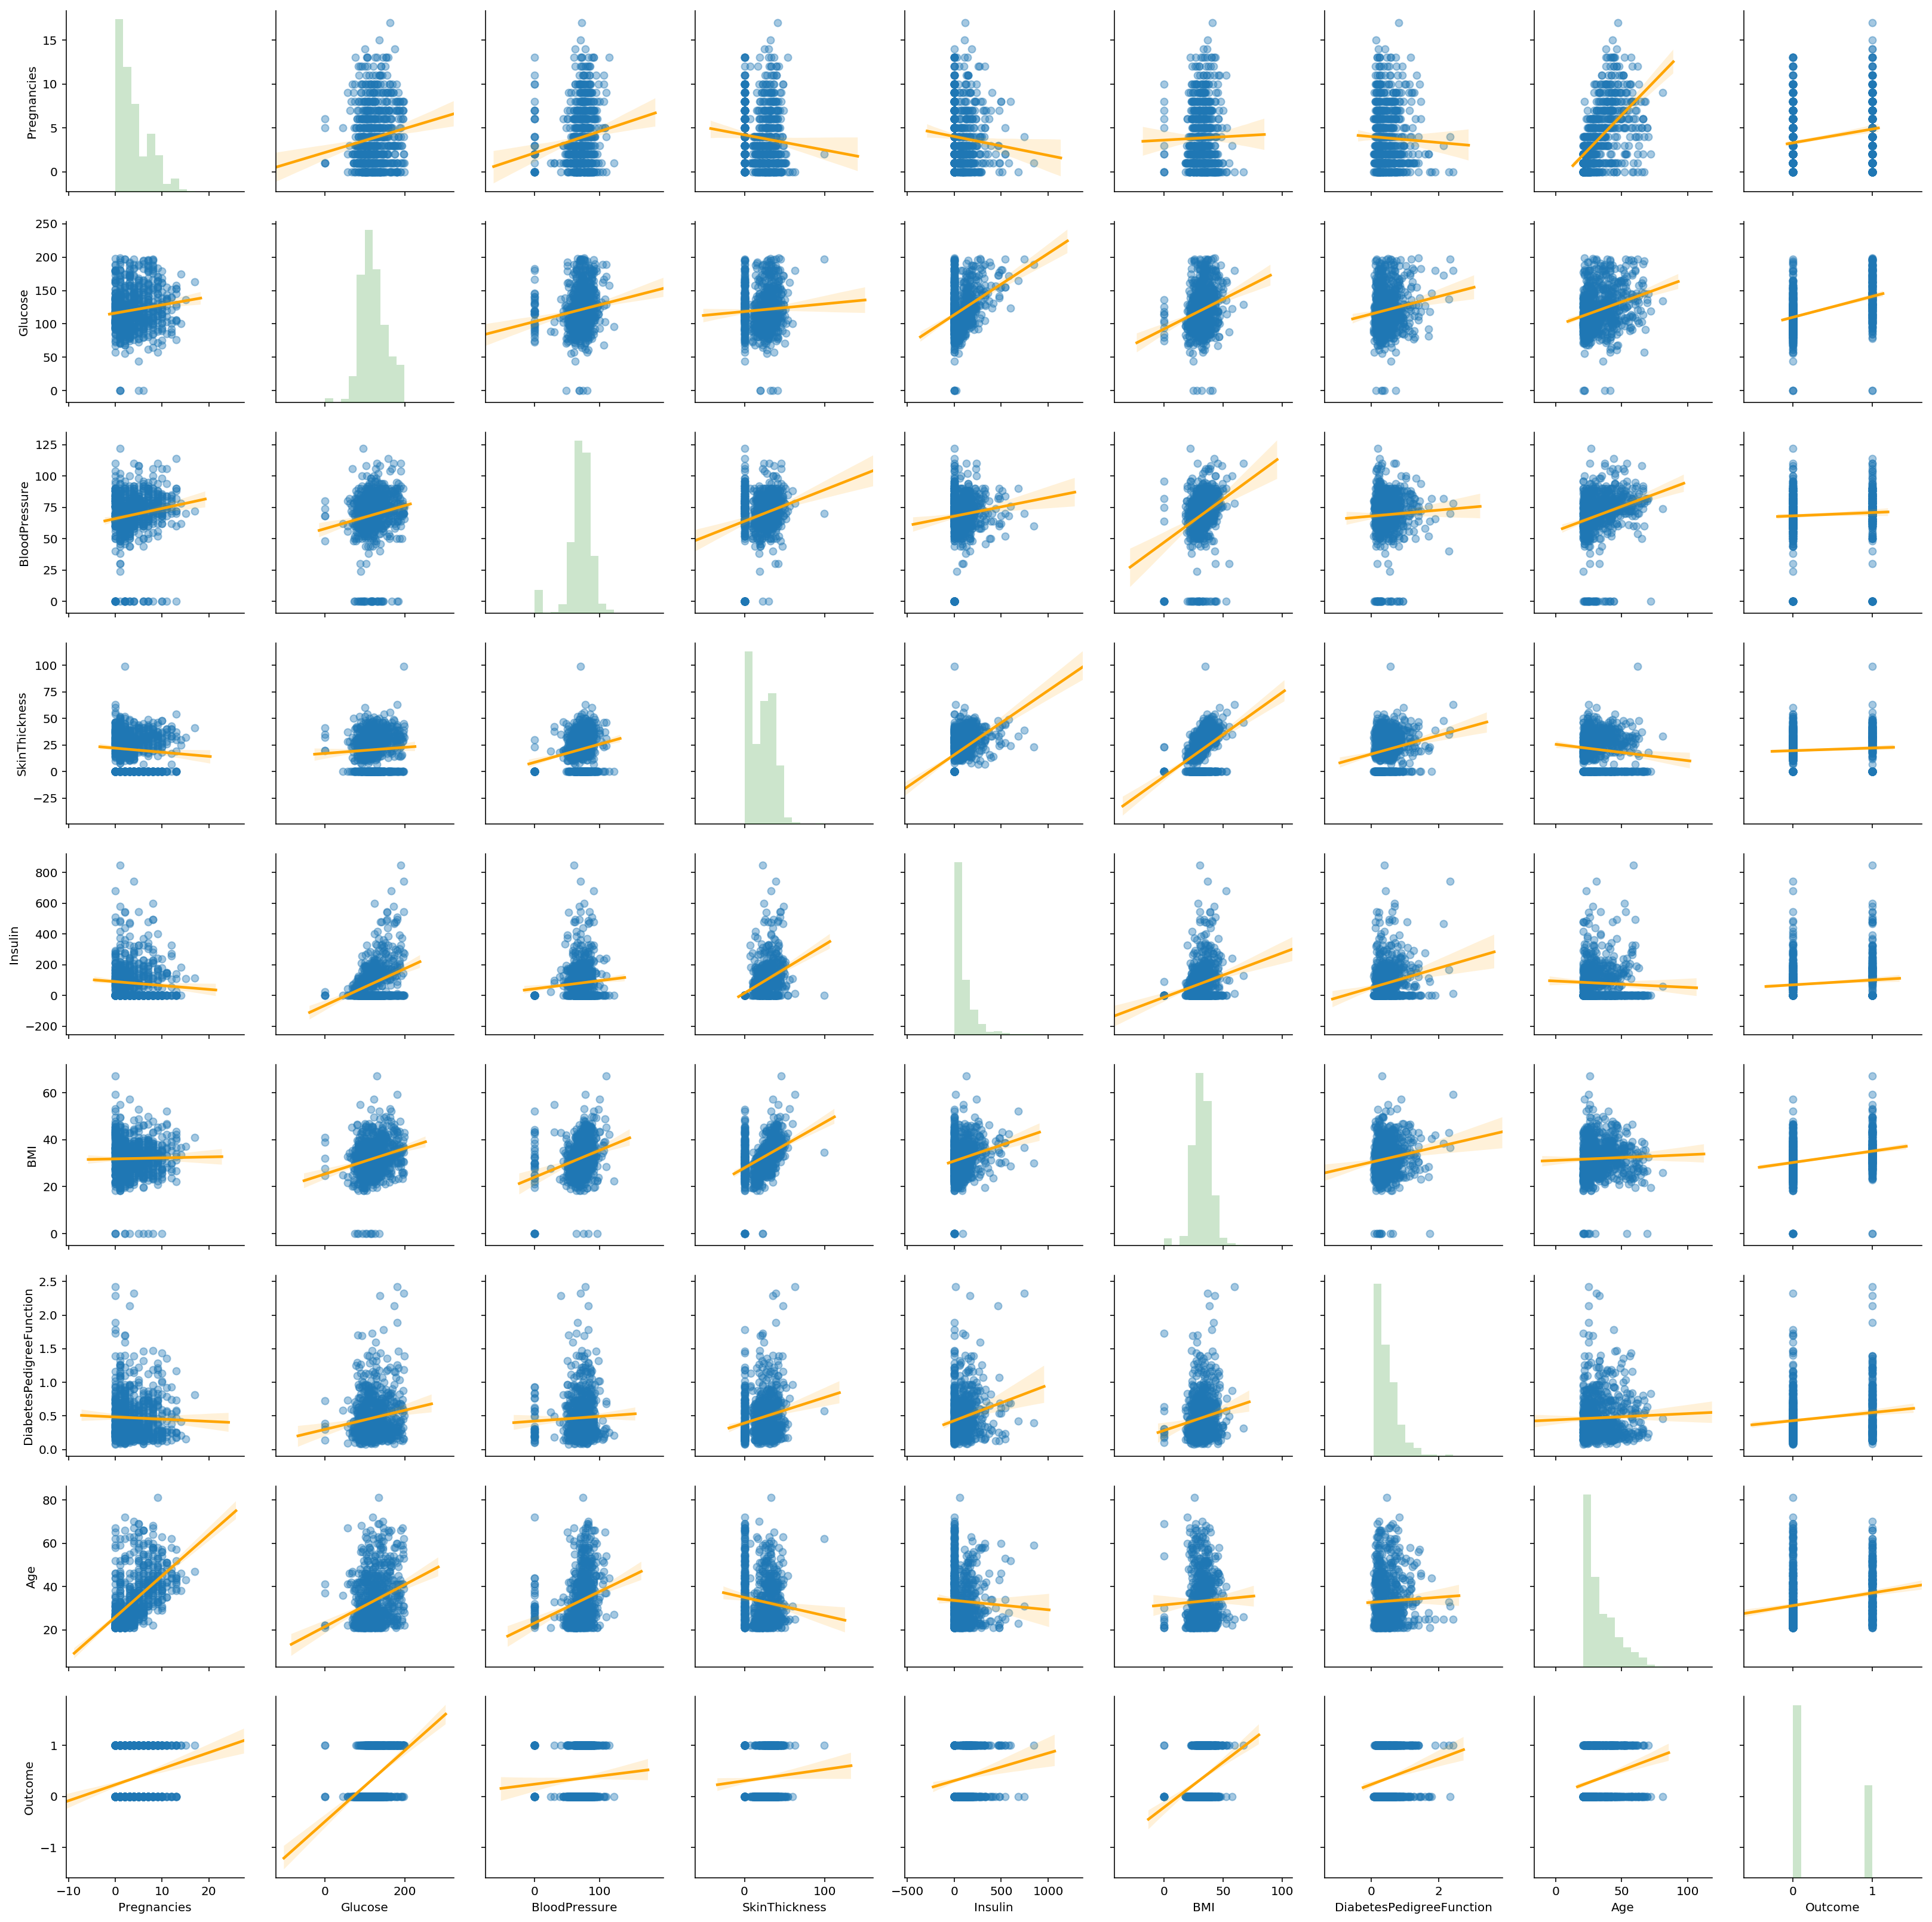

In [5]:
sns.pairplot(df,
             kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.4}, 
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

## sklearn: Classifier

In [6]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import metrics

In [7]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 0.20.2


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [34]:
# model= DecisionTreeClassifier(random_state=7)
model= RandomForestClassifier(n_estimators=250, random_state=7)
# model= ExtraTreesClassifier(n_estimators=250, random_state=7)
X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=df['Outcome']
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [35]:
model.feature_importances_

array([0.084649  , 0.25538214, 0.08686371, 0.06915221, 0.07227062,
       0.16934724, 0.12464596, 0.13768912])

In [36]:
fs=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
fs

SkinThickness               0.069152
Insulin                     0.072271
Pregnancies                 0.084649
BloodPressure               0.086864
DiabetesPedigreeFunction    0.124646
Age                         0.137689
BMI                         0.169347
Glucose                     0.255382
dtype: float64

In [37]:
fs.sum()

1.0

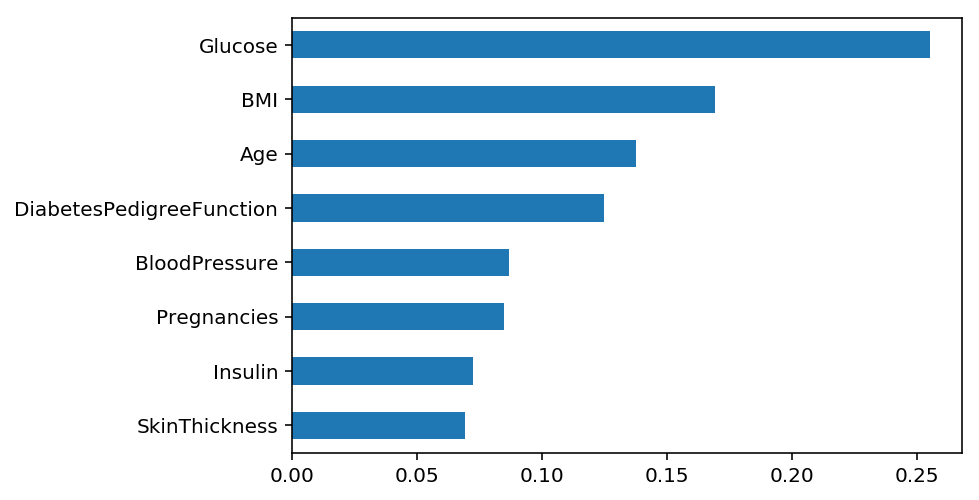

In [38]:
fs.plot(kind='barh')

In [39]:
fs[fs > .1]

DiabetesPedigreeFunction    0.124646
Age                         0.137689
BMI                         0.169347
Glucose                     0.255382
dtype: float64

In [40]:
fs.nlargest(4) #.index

Glucose                     0.255382
BMI                         0.169347
Age                         0.137689
DiabetesPedigreeFunction    0.124646
dtype: float64

In [41]:
fs[fs > .1].index

Index(['DiabetesPedigreeFunction', 'Age', 'BMI', 'Glucose'], dtype='object')

In [42]:
X=df[fs[fs > .1].index]
X.head()

,DiabetesPedigreeFunction,Age,BMI,Glucose
0,0.627,50,33.6,148
1,0.351,31,26.6,85
2,0.672,32,23.3,183
3,0.167,21,28.1,89
4,2.288,33,43.1,137


In [43]:
X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
# X=df[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']]
# X=df[fs[fs > .1].index]
y=df['Outcome']

In [44]:
# use stratify to split train/test
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    stratify=y,
                                                    random_state=7)

## scikit-learn: confusion matrix
$$
\begin{bmatrix}
C_{0,0} & C_{0,1} \\
C_{1,0} & C_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
tn&fp \\
fn&tp
\end{bmatrix}
$$

<table>
<tr>
    <td></td>
    <td>predicted false</td>
    <td>predicted true</td>
</tr>
<tr>
    <td>actual false</td>
    <td>tn</td>
    <td>fp</td>
</tr>
<tr>
    <td>actual true</td>
    <td>fn</td>
    <td>tp</td>
</tr>
<table>

In [45]:
algo=[
    [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'], 
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'], 
    [Perceptron(), 'Perceptron'],
    [DecisionTreeClassifier(min_samples_split=10), 'DecisionTreeClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier'],
    [GaussianNB(), 'GaussianNB'],
    [MLPClassifier(), 'MLPClassifier'],
    [SVC(kernel='linear'), 'SVC_linear'], 
    [GaussianProcessClassifier(), 'GaussianProcessClassifier']
]
model_scores=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

print(model_scores)
print(f'best score = {max(model_scores)}')    

KNeighborsClassifier score: 0.7316
[[128  22]
 [ 40  41]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.81       150
           1       0.65      0.51      0.57        81

   micro avg       0.73      0.73      0.73       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231

----------------------------------------------------------------------------------------------------
LogisticRegression   score: 0.7273
[[133  17]
 [ 46  35]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       150
           1       0.67      0.43      0.53        81

   micro avg       0.73      0.73      0.73       231
   macro avg       0.71      0.66      0.67       231
weighted avg       0.72      0.73      0.71       231

----------------------------------------------------------------------------------------------------
Perceptron           score: 

/Users/prasert/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/prasert/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/prasert/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier score: 0.7532
[[136  14]
 [ 43  38]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       150
           1       0.73      0.47      0.57        81

   micro avg       0.75      0.75      0.75       231
   macro avg       0.75      0.69      0.70       231
weighted avg       0.75      0.75      0.74       231

----------------------------------------------------------------------------------------------------
BaggingClassifier    score: 0.7489
[[134  16]
 [ 42  39]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       150
           1       0.71      0.48      0.57        81

   micro avg       0.75      0.75      0.75       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.74      0.75      0.73       231

----------------------------------------------------------------------------------------------------
AdaBoostClassifier   score

/Users/prasert/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier        score: 0.6450
[[104  46]
 [ 36  45]]
              precision    recall  f1-score   support

           0       0.74      0.69      0.72       150
           1       0.49      0.56      0.52        81

   micro avg       0.65      0.65      0.65       231
   macro avg       0.62      0.62      0.62       231
weighted avg       0.66      0.65      0.65       231

----------------------------------------------------------------------------------------------------
SVC_linear           score: 0.7532
[[132  18]
 [ 39  42]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       150
           1       0.70      0.52      0.60        81

   micro avg       0.75      0.75      0.75       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231

----------------------------------------------------------------------------------------------------
GaussianProcessClassifier sc

In [22]:
model_scores

[[0.7402597402597403, 'KNeighborsClassifier'],
 [0.7878787878787878, 'LogisticRegression'],
 [0.6493506493506493, 'Perceptron'],
 [0.7186147186147186, 'DecisionTreeClassifier'],
 [0.7532467532467533, 'GradientBoostingClassifier'],
 [0.7619047619047619, 'RandomForestClassifier'],
 [0.7186147186147186, 'BaggingClassifier'],
 [0.7359307359307359, 'AdaBoostClassifier'],
 [0.7835497835497836, 'GaussianNB'],
 [0.7316017316017316, 'MLPClassifier'],
 [0.7792207792207793, 'SVC_linear'],
 [0.6883116883116883, 'GaussianProcessClassifier']]

In [23]:
dscore=pd.DataFrame(model_scores, columns=['score', 'classifier'])
dscore.sort_values('score', ascending=False)

,score,classifier
1,0.787879,LogisticRegression
8,0.783550,GaussianNB
10,0.779221,SVC_linear
5,0.761905,RandomForestClassifier
4,0.753247,GradientBoostingClassifier
0,0.740260,KNeighborsClassifier
7,0.735931,AdaBoostClassifier
9,0.731602,MLPClassifier
3,0.718615,DecisionTreeClassifier
6,0.718615,BaggingClassifier
